# Data preparation

## Processing raw data

In [1]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!pip install git+https://github.com/medianeuroscience/emfdscore.git

### Import Required Python Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

from statsmodels.iolib.summary2 import summary_col

# Disable warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [16]:
data1 = pd.read_csv('general_media_final_dataset.csv').drop('Unnamed: 0',axis=1)
data2 = pd.read_csv('final_science_media_data.csv').drop('Unnamed: 0',axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'general_media_final_dataset.csv'

In [4]:
# removed drona from below code as we are doing same thing in next block of code
data3 = pd.read_csv('2021-10-22-09-22-53-EDT-Historical-Report-BuzzFeed-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1")
data4 = pd.read_csv('2021-10-22-09-21-54-EDT-Historical-Report-The-Daily-Caller-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1")
data5 = pd.read_csv('2021-10-23-10-02-33-EDT-Historical-Report-Vox-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1")
data6 = pd.read_csv('2021-10-22-09-19-11-EDT-Historical-Report-Washington-Examiner-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1")

/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data1.head(1)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,URL,Message,Link,Link Text,Description,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563194,38359686.0,2021-06-30 23:45:28 EDT,...,-,0,0,0,https://www.facebook.com/5550296508/posts/1016...,College athletes will have the opportunity to ...,https://cnn.it/2SDgOSO,"Starting Thursday, college athletes can profit...",,-14.87


In [6]:
data2.head(1)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,URL,Message,Link,Link Text,Description,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,Women’s Health - Mayo Clinic,mayoclinicwomenshealth,177120669027178,WOMENS_HEALTH_CLINIC,US,To request an appointment: Arizona: 480-301-17...,2011-08-11 18:28:43,6120.0,6604.0,2021-06-02 09:55:14 EDT,...,-,0,0,0,https://www.facebook.com/177120669027178/posts...,"Click the link below to RSVP for the ""Take Cha...",https://www.facebook.com/mayoclinicwomenshealt...,Timeline Photos,,-28.0


In [7]:
data3.head(1)

,ï»¿Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted â Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,BuzzFeed,BuzzFeed,21898300328,MEDIA_NEWS_COMPANY,US,Worth sharing.,2007-11-28 21:17:20,12078663,13401610.0,2021-06-30 23:50:01 EDT,...,I can say this series puts 50 Shades of Grey t...,https://www.buzzfeed.com/ehisosifo1/funny-twee...,NaN,NaN,19 Tweets About &quot;Sex/Life&quot; Because I...,I can say this series puts 50 Shades of Grey t...,NaN,NaN,NaN,-5.38


### Keep Posts from **2020.1.1 to 2021.6.30**

In [8]:
# drop missing
data1.dropna(inplace=True)
data2.dropna(inplace=True)
data3.dropna(inplace=True)
data4.dropna(inplace=True)
data5.dropna(inplace=True)
data6.dropna(inplace=True)

In [9]:
# this code is fine ,There is no better alternate
"""
For the selection, we need first to turn the date column to DateTime Format(instead of string), we can do it using to_datetime method from pandas
library
"""
data1['Post Created Date'] = pd.to_datetime(data1['Post Created Date']) 
data2['Post Created Date'] = pd.to_datetime(data2['Post Created Date']) 
data3['Post Created Date'] = pd.to_datetime(data3['Post Created Date']) 
data4['Post Created Date'] = pd.to_datetime(data4['Post Created Date']) 
data5['Post Created Date'] = pd.to_datetime(data5['Post Created Date']) 
data6['Post Created Date'] = pd.to_datetime(data6['Post Created Date']) 

In [10]:
#If you are going to do a lot of selections by date, it may be quicker to set the date column as the index first. Then you can select rows by date using df.loc[start_date:end_date].
# change the dataframe and dates according to your need
"""import numpy as np
#import pandas as pd

#df = pd.DataFrame(np.random.random((200,3)))
#df['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
#df = df.set_index(['date'])
#print(df.loc['2000-6-1':'2000-6-10'])"""
"""

Now lets do the selection
"""
start_date = '2010.1.1'
end_date = '2021.6.30'
#greater than the start date and smaller than the end date
mask1 = (data1['Post Created Date'] > start_date) & (data1['Post Created Date'] <= end_date)
mask2 = (data2['Post Created Date'] > start_date) & (data2['Post Created Date'] <= end_date)
mask3 = (data3['Post Created Date'] > '2020.1.1') & (data3['Post Created Date'] <= '2021.6.30')
mask4 = (data4['Post Created Date'] > '2020.1.1') & (data4['Post Created Date'] <= '2021.6.30')
mask5 = (data5['Post Created Date'] > '2020.1.1') & (data5['Post Created Date'] <= '2021.6.30')
mask6 = (data6['Post Created Date'] > '2020.1.1') & (data6['Post Created Date'] <= '2021.6.30')

# Access a group of rows and columns by label(s) or indexes
data1 = data1.loc[mask1]
data2 = data2.loc[mask2]
data3 = data3.loc[mask3]
data4 = data4.loc[mask4]
data5 = data5.loc[mask5]
data6 = data6.loc[mask6]

In [11]:
"""
Now we will create a new column named LNC_category which means (liberal,neutral or conservative) based on user name.
"""
liberal = ['dailykos', 'nytimes', 'HuffingtonPostOfficial', 'washingtonpost', 'msnbc', 'bbc', 'cnn', 'nbc', 'NPR','Buzzfeed', 'Vox']
neutral = ['usatoday', 'nbc', 'Reuters', 'WSJ', 'ABCNetwork', 'CBS']
conservative = ['Breitbart','FoxNews','TheBlaze','Daily Caller', 'Washington examiner' ]

def match(username):
    if username in liberal:
        return 'liberal'
    elif username in neutral:
        return 'neutral'
    elif username in conservative:
        return 'conservative'
    else: return np.nan
    
# remove space
data1['User Name'] = data1['User Name'].str.replace(' ', '')
data2['User Name'] = data2['User Name'].str.replace(' ', '')

# create a new column LNC_category by passing username value to match function
data1['LNC_category']=data1['User Name'].apply(lambda x: match(x))
data2['LNC_category']=data2['User Name'].apply(lambda x: match(x))


In [14]:
df = pd.read_csv('MediaBiasScore.csv')

In [15]:
df.head()

,Media,MediaBiasScore,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Daily Kos,0.00,NaN,NaN,NaN,NaN
1,MSNBC,0.13,NaN,NaN,NaN,NaN
2,Huffington Post,0.20,NaN,NaN,NaN,NaN
3,Vox,0.23,NaN,NaN,NaN,NaN
4,CNN,0.28,NaN,NaN,NaN,NaN


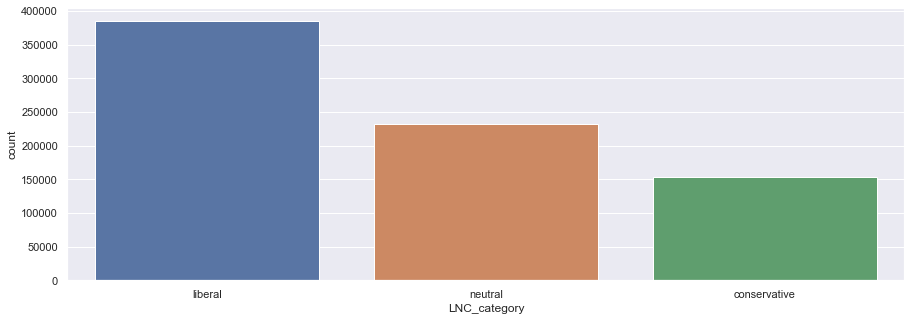

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="LNC_category", data=data1)

In [13]:
"""
# change data value to science channel 
"""
data2['User Name'] = data2['User Name'].apply(lambda x: 'science channel')
data2['LNC_category'] = 'science'

data3['User Name'] = data3['User Name'].apply(lambda x: 'science channel')
data3['LNC_category'] = 'science'

data4['User Name'] = data4['User Name'].apply(lambda x: 'science channel')
data4['LNC_category'] = 'science'

data5['User Name'] = data5['User Name'].apply(lambda x: 'science channel')
data5['LNC_category'] = 'liberal'

data6['User Name'] = data6['User Name'].apply(lambda x: 'science channel')
data6['LNC_category'] = 'science'

In [14]:
# combine all data into all
frames = [data1,data2,data3,data4,data5,data6]
data = pd.concat(frames)

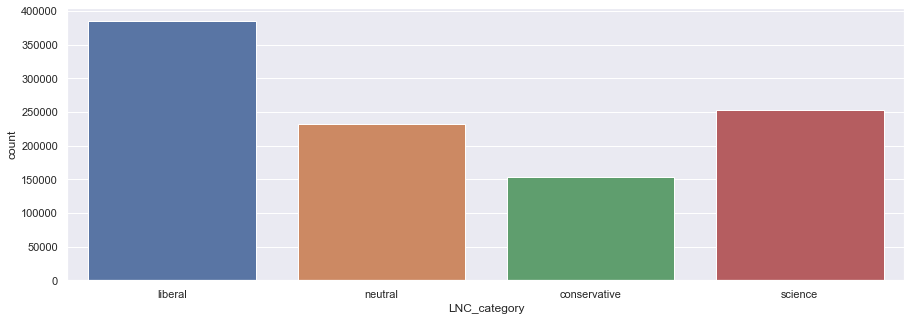

In [15]:
# already mentioned alternate above
ax = sns.countplot(x="LNC_category", data=data)

In [16]:
data.to_csv('data_final.csv',index=False)